Load libraries.

In [35]:
import pandas as pd
import numpy as np

Read Parks data from excel file.

In [36]:
parks = pd.read_excel("data/raw/parks.xlsx")

In [37]:
parks.head()

,title,description,field_unit,park,lat,lon,province,contact_internal,fuia_num,assessment_type,...,ia_decision_date,mitigation_applied,attach_ia,created,modified,created_by,modified_by,id,item_type,path
0,Prince of Wales Fort National Historic Site Li...,A loader and excavator have been staged at the...,Manitoba,Prince of Wales Fort National Historic Site of...,58.793842,-94.218092,Manitoba,Harv Sawatzky,2021-PWF-002,Basic impact assessment,...,NaT,NaN,NaN,2021-08-19 13:29:08,2021-08-19 13:29:15,Harv Sawatzky,Harv Sawatzky,281,Item,sites/ImpactAssessment/Lists/DIA Tracking List
1,Pilot Spring Development Project in the East B...,Grasslands National Park uses livestock grazin...,Saskatchewan South,Grasslands National Park of Canada,49.15466235427803,-106.81900522887689,Saskatchewan,Krista Cairns,NaN,Basic impact assessment,...,2021-08-17,NaN,NaN,2021-08-17 17:48:41,2021-08-17 17:48:44,Samantha Grant,Samantha Grant,280,Item,sites/ImpactAssessment/Lists/DIA Tracking List
2,SaskPower Line Trenching at Operations Compound,.PROJECT DESCRIPTION\nSaskPower is proposing t...,Northern Prairies,Prince Albert National Park of Canada,53.914782,106.06971,Saskatchewan,Fiona Moreland,NaN,Basic impact assessment,...,NaT,NaN,NaN,2021-08-17 14:48:38,2021-08-17 14:48:38,Fiona Moreland,Fiona Moreland,279,Item,sites/ImpactAssessment/Lists/DIA Tracking List
3,Margaret Creek Fish Barrier Creation,Creation of a fish migration barrier on Margar...,Kootenay and Yoho,Banff National Park of Canada,543838E,5714873N,Alberta,Monica Lillico (Monica.Lillico@canada.ca) / No...,LLYK_2021-006L,Basic impact assessment,...,NaT,NaN,NaN,2021-08-11 19:37:42,2021-08-11 19:39:52,Monica Lillico,Monica Lillico,278,Item,sites/ImpactAssessment/Lists/DIA Tracking List
4,PCA Castle Mountain Campground Utilities Upgrade,"Castle Mountain Campground Renewal, including:...",Banff,Banff National Park of Canada,51.268334N,115.911397W,Alberta,Kelsey Tillapaugh,BNP 1371,Basic impact assessment,...,NaT,NaN,NaN,2021-08-09 18:35:02,2021-08-09 18:35:02,Anna Brown,Anna Brown,277,Item,sites/ImpactAssessment/Lists/DIA Tracking List


Subset BIAs that are written in English. <br>
First check for null values.

In [38]:
np.where(parks['assessment_type'].isnull())[0]

array([135])

In [39]:
print(parks.loc[135])

title                  Réfection des passerelles Senkus et Grue LaSal...
description            Parcs Canada prévoit procéder à la réfection d...
field_unit                                              Quebec Waterways
park                      Lachine Canal National Historic Site of Canada
lat                                                            45.450030
lon                                                           -73.627198
province                                                          Quebec
contact_internal                                          Karine Lalonde
fuia_num                                                   CLAC-(899-11)
assessment_type                                                      NaN
proponent                                                   Parks Canada
other_depts                                                           No
select_other_dept                                                    NaN
select_other_juris                                 

The null value is for a French project description, so ignore.

In [40]:
BIAs = parks[parks['assessment_type'] == 'Basic impact assessment'].copy()
BIAs.shape

(270, 27)

There are 270 BIAs. Subset to English BIAs only. We will do this by checking the language of the project description.

In [41]:
from langdetect import detect

In [42]:
lang_check = BIAs['description'].apply(detect)
BIAs['lang_check'] = lang_check.values
BIAs.head()


,title,description,field_unit,park,lat,lon,province,contact_internal,fuia_num,assessment_type,...,mitigation_applied,attach_ia,created,modified,created_by,modified_by,id,item_type,path,lang_check
0,Prince of Wales Fort National Historic Site Li...,A loader and excavator have been staged at the...,Manitoba,Prince of Wales Fort National Historic Site of...,58.793842,-94.218092,Manitoba,Harv Sawatzky,2021-PWF-002,Basic impact assessment,...,NaN,NaN,2021-08-19 13:29:08,2021-08-19 13:29:15,Harv Sawatzky,Harv Sawatzky,281,Item,sites/ImpactAssessment/Lists/DIA Tracking List,en
1,Pilot Spring Development Project in the East B...,Grasslands National Park uses livestock grazin...,Saskatchewan South,Grasslands National Park of Canada,49.15466235427803,-106.81900522887689,Saskatchewan,Krista Cairns,NaN,Basic impact assessment,...,NaN,NaN,2021-08-17 17:48:41,2021-08-17 17:48:44,Samantha Grant,Samantha Grant,280,Item,sites/ImpactAssessment/Lists/DIA Tracking List,en
2,SaskPower Line Trenching at Operations Compound,.PROJECT DESCRIPTION\nSaskPower is proposing t...,Northern Prairies,Prince Albert National Park of Canada,53.914782,106.06971,Saskatchewan,Fiona Moreland,NaN,Basic impact assessment,...,NaN,NaN,2021-08-17 14:48:38,2021-08-17 14:48:38,Fiona Moreland,Fiona Moreland,279,Item,sites/ImpactAssessment/Lists/DIA Tracking List,en
3,Margaret Creek Fish Barrier Creation,Creation of a fish migration barrier on Margar...,Kootenay and Yoho,Banff National Park of Canada,543838E,5714873N,Alberta,Monica Lillico (Monica.Lillico@canada.ca) / No...,LLYK_2021-006L,Basic impact assessment,...,NaN,NaN,2021-08-11 19:37:42,2021-08-11 19:39:52,Monica Lillico,Monica Lillico,278,Item,sites/ImpactAssessment/Lists/DIA Tracking List,en
4,PCA Castle Mountain Campground Utilities Upgrade,"Castle Mountain Campground Renewal, including:...",Banff,Banff National Park of Canada,51.268334N,115.911397W,Alberta,Kelsey Tillapaugh,BNP 1371,Basic impact assessment,...,NaN,NaN,2021-08-09 18:35:02,2021-08-09 18:35:02,Anna Brown,Anna Brown,277,Item,sites/ImpactAssessment/Lists/DIA Tracking List,en


In [43]:
BIAs['lang_check'].value_counts()

en    244
fr     26
Name: lang_check, dtype: int64

Subset the English BIAs. There should be 244. 

In [44]:
BIA_en = BIAs[BIAs['lang_check'] == 'en'].copy()
BIA_en.shape

(244, 28)

Subset the English BIAs to only those that have a completion date.  

In [45]:
BIAs_complete = BIA_en[BIA_en['ia_decision_date'].notnull()].copy()
BIAs_complete.head()

,title,description,field_unit,park,lat,lon,province,contact_internal,fuia_num,assessment_type,...,mitigation_applied,attach_ia,created,modified,created_by,modified_by,id,item_type,path,lang_check
1,Pilot Spring Development Project in the East B...,Grasslands National Park uses livestock grazin...,Saskatchewan South,Grasslands National Park of Canada,49.15466235427803,-106.81900522887689,Saskatchewan,Krista Cairns,NaN,Basic impact assessment,...,NaN,NaN,2021-08-17 17:48:41,2021-08-17 17:48:44,Samantha Grant,Samantha Grant,280,Item,sites/ImpactAssessment/Lists/DIA Tracking List,en
13,Harvesting tame forage in Grasslands National ...,Grasslands National Park is proposing to allow...,Saskatchewan South,Grasslands National Park of Canada,49.216935,-107.562290,Saskatchewan,Sherri Clifford,SSFU-2021-027-GNP,Basic impact assessment,...,NaN,NaN,2021-07-19 17:19:47,2021-08-03 12:02:51,Krista Cairns,Krista Cairns,268,Item,sites/ImpactAssessment/Lists/DIA Tracking List,en
21,Prince of Wales Fort Dock Dredging,"Since the main access to PWF is by boat, the c...",Manitoba,Prince of Wales Fort National Historic Site of...,58.793629,94.216605,Manitoba,Harv Sawatzky A/Asset Manager,2021-PWF-001,Basic impact assessment,...,Air;#Water;#Fish;#Other aquatic organisms;#Soil,NaN,2021-06-25 13:24:46,2021-08-06 08:52:26,Harv Sawatzky,Felipe Casasanta Mostaço,260,Item,sites/ImpactAssessment/Lists/DIA Tracking List,en
26,The Living Landscapes of SGang Gwaay: strength...,A Gwaii Haanas Conservation and Restoration Pr...,Gwaii Haanas,Gwaii Haanas National Park Reserve and Haida H...,52.095,-131.22,British Columbia,Basia Wojtaszek Barbara.Wojtaszek@canada.ca an...,GHE 2021-01,Basic impact assessment,...,Water;#Wildlife;#Birds;#Species at risk;#Air;#...,NaN,2021-06-02 14:25:16,2021-07-13 12:09:23,Charlotte Houston,Barbara Wojtaszek,255,Item,sites/ImpactAssessment/Lists/DIA Tracking List,en
28,Placement of Permanent Fill below the Upper Co...,The owners of five properties bordering the Ri...,Waterways,Rideau Canal National Historic Site of Canada,See attached document,See attached document,Ontario,Hillary Knack,RC-2021-02,Basic impact assessment,...,Water;#Fish;#Other aquatic organisms;#Wildlife...,NaN,2021-05-27 11:29:55,2021-07-05 14:56:54,Hillary Knack,Hillary Knack,253,Item,sites/ImpactAssessment/Lists/DIA Tracking List,en


In [46]:
BIAs_complete.shape # check number of complete entries

(132, 28)

Subset the complete entries to only those where Parks Canada was the proponent.

In [47]:
BIAs_complete = BIAs_complete.loc[BIAs_complete['proponent'] == 'Parks Canada']
BIAs_complete.shape # check new size  dataframe

(86, 28)

In [48]:
BIAs_complete['proponent'].unique() # check that filter worked

array(['Parks Canada'], dtype=object)

Do a word count on the project descriptions and create a column for word count.

In [49]:
wordcount = BIAs_complete['description'].str.split().str.len()
BIAs_complete['wordcount'] = wordcount.values

<AxesSubplot:>

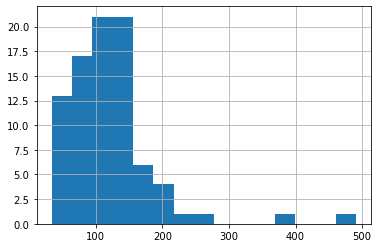

In [50]:
BIAs_complete['wordcount'].hist(bins=15)



In [51]:
print(BIAs_complete['wordcount'].mean())
print(BIAs_complete['wordcount'].median())

121.62790697674419
118.0


The median wordcount is 118. An average English sentence is 15-20 words. We will only sample BIAs with a project description of 100 words or more. This will be sufficient to run readability tests.

In [52]:
BIA_100 = BIAs_complete[BIAs_complete['wordcount'] >= 100].copy()
BIA_100.head()


,title,description,field_unit,park,lat,lon,province,contact_internal,fuia_num,assessment_type,...,attach_ia,created,modified,created_by,modified_by,id,item_type,path,lang_check,wordcount
21,Prince of Wales Fort Dock Dredging,"Since the main access to PWF is by boat, the c...",Manitoba,Prince of Wales Fort National Historic Site of...,58.793629,94.216605,Manitoba,Harv Sawatzky A/Asset Manager,2021-PWF-001,Basic impact assessment,...,NaN,2021-06-25 13:24:46,2021-08-06 08:52:26,Harv Sawatzky,Felipe Casasanta Mostaço,260,Item,sites/ImpactAssessment/Lists/DIA Tracking List,en,112
39,Vegetation Management - Bennett Lake Dam & Wol...,Fundy National Park intends to initiate a vege...,Southern New Brunswick,Fundy National Park of Canada,45.62874,65.07802,New Brunswick,Shirley Butland,NBSouth-2021-EIA-6,Basic impact assessment,...,NaN,2021-05-03 09:33:36,2021-07-05 15:46:18,Shirley Butland,Shirley Butland,241,Item,sites/ImpactAssessment/Lists/DIA Tracking List,en,113
49,West Coast Trail Bridge (#96) Support Repair,An impact assessment is required to address po...,Coastal British Columbia,Pacific Rim National Park Reserve of Canada,"48°47'31.2""N","125°09'21.8""W",British Columbia,Nicole Paleczny,PRNPR-0331,Basic impact assessment,...,NaN,2021-04-08 14:18:16,2021-05-17 19:49:20,Nicole Paleczny,Nicole Paleczny,231,Item,sites/ImpactAssessment/Lists/DIA Tracking List,en,131
50,Escape Island Installation on Saddle Island,Red Bay’s 2011 management plan identified stra...,Newfoundland West/Labrador,Red Bay National Historic Site of Canada,"51°43'32.12""N","56°25'45.85""W",Newfoundland and Labrador,Courtney King,RB-2021-001,Basic impact assessment,...,NaN,2021-03-25 14:14:35,2021-05-06 13:35:07,Courtney King,Courtney King,229,Item,sites/ImpactAssessment/Lists/DIA Tracking List,en,131
51,"Redstreak Lagoon Decommission and Reclamation,...",The objective of this project is to complete t...,Kootenay and Yoho,Kootenay National Park of Canada,50.619222°,-116.054211°,British Columbia,Alli Banting allison.banting@canada.ca,2021-007K,Basic impact assessment,...,NaN,2021-03-25 13:04:00,2021-08-06 15:09:50,Allison Banting,Allison Banting,228,Item,sites/ImpactAssessment/Lists/DIA Tracking List,en,197


In [53]:
BIA_100.shape

(54, 29)

Randomly sample 50 BIAs for the readability tests. Write them to a file for later use.

In [55]:
#BIA_select = BIA_100.sample(n=50)

#BIA_select.to_excel("data/processed/BIA_50select_Aug27.xlsx")

From the 50 selected for readability tests, randomly select 20 for further analysis using final BIA report. Sort the 20 select for convenience of collecting the reports.

In [56]:
#BIA_select20 = BIA_select.sample(n=20)
#BIA_select20.to_excel("data/processed/BIA_20select_Aug27.xlsx")

In [59]:
#BIA_20_sorted = BIA_select20.sort_values(by = 'contact_internal')
#BIA_20_sorted.to_excel("data/processed/BIA_20select_Aug27_sorted.xlsx")